### Import Libreries

In [1041]:
#main Libraries
import pandas as pd
from pandas import DataFrame
import os
import numpy as np
#visualisation libreries
import seaborn as sns 
from matplotlib import pyplot as plt
%matplotlib inline

# Multi Label Pkgs
from skmultilearn.problem_transform import BinaryRelevance 
from skmultilearn.problem_transform import ClassifierChain 
from skmultilearn.problem_transform import LabelPowerset
from skmultilearn.adapt import MLkNN
from sklearn import metrics
#Library for training
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Working on the data

In [1042]:
# import data with panda
#data = pd.read_csv("pkt_radish.csv", engine='python', index_col = 0)
data = pd.read_csv("data_agriculture.csv", engine='python', index_col = 0)
data.describe()

,dayAvgRhm,dayAvgTa,dayAvgWs,dayMaxTa,dayMinRhm,daySumRn,daySumSs
count,5673.000000,5673.000000,5673.000000,5673.000000,5673.000000,5673.000000,5673.000000
mean,45.559669,8.763617,1.088666,11.959633,29.640578,1.991363,2.433104
std,34.274971,9.933435,1.239796,11.568598,25.224696,10.208532,3.802857
min,0.000000,-14.000000,0.000000,-9.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.000000,6.000000,1.000000,10.000000,32.000000,0.000000,0.000000
75%,73.000000,18.000000,2.000000,23.000000,50.000000,0.000000,5.000000
max,100.000000,32.000000,11.000000,39.000000,99.000000,265.000000,13.000000


## Data understanding throught visualisation

## Cleaning dataset

In [1043]:
# making a copy of the dataset in what we will work 
data_c = data.copy()

In [1044]:
#check if there sis null values in dataset
data_c.isnull().sum().sum()

7604

In [1045]:
# reemoving all empty data 
data_c = data_c.dropna(how='any')

In [1046]:
data_c

,date,area,dayAvgRhm,dayAvgTa,dayAvgWs,dayMaxTa,dayMinRhm,daySumRn,daySumSs,paCropName,paCropSpeId
idx,,,,,,,,,,,
2,2017-01-05,춘천,74,2,1,7,52,0,0,들깨,PA100101
4,2017-01-27,춘천,62,-1,2,2,33,5,8,들깨,PA100101
5,2017-01-07,춘천,89,0,0,7,54,0,4,들깨,PA100101
7,2017-01-03,춘천,78,0,1,7,31,0,5,들깨,PA100101
9,2017-01-06,춘천,77,3,0,10,41,0,7,들깨,PA100101
...,...,...,...,...,...,...,...,...,...,...,...
5669,2020-12-18,제주,57,7,3,10,42,0,1,쪽파,PA290101
5670,2020-12-06,제주,60,8,1,11,48,0,8,쪽파,PA290101
5671,2020-12-31,제주,68,2,6,4,49,3,0,쪽파,PA290101


In [1047]:
#checking if there still a null value in the dataset
data_c.isnull().sum()

date           0
area           0
dayAvgRhm      0
dayAvgTa       0
dayAvgWs       0
dayMaxTa       0
dayMinRhm      0
daySumRn       0
daySumSs       0
paCropName     0
paCropSpeId    0
dtype: int64

In [1048]:
# checking data type 
for dtype in data.dtypes.iteritems(): 
    print(dtype)

('date', dtype('O'))
('area', dtype('O'))
('dayAvgRhm', dtype('int64'))
('dayAvgTa', dtype('int64'))
('dayAvgWs', dtype('int64'))
('dayMaxTa', dtype('int64'))
('dayMinRhm', dtype('int64'))
('daySumRn', dtype('int64'))
('daySumSs', dtype('int64'))
('paCropName', dtype('O'))
('paCropSpeId', dtype('O'))


## Feature Modelisation

In [1049]:
data_c.columns

Index(['date', 'area', 'dayAvgRhm', 'dayAvgTa', 'dayAvgWs', 'dayMaxTa',
       'dayMinRhm', 'daySumRn', 'daySumSs', 'paCropName', 'paCropSpeId'],
      dtype='object')

In [1050]:
data_c.shape

(3772, 11)

In [1051]:
#transform string to day time 
data_c['date'] = pd.to_datetime(data_c['date'], errors = 'coerce')
data_c.date.head()

idx
2   2017-01-05
4   2017-01-27
5   2017-01-07
7   2017-01-03
9   2017-01-06
Name: date, dtype: datetime64[ns]

In [1052]:
# creating separate columns for month and day because
data_c['month'] = data_c['date'].dt.month
data_c['day'] = data_c['date'].dt.day
data_c.head(10000)

,date,area,dayAvgRhm,dayAvgTa,dayAvgWs,dayMaxTa,dayMinRhm,daySumRn,daySumSs,paCropName,paCropSpeId,month,day
idx,,,,,,,,,,,,,
2,2017-01-05,춘천,74,2,1,7,52,0,0,들깨,PA100101,1,5
4,2017-01-27,춘천,62,-1,2,2,33,5,8,들깨,PA100101,1,27
5,2017-01-07,춘천,89,0,0,7,54,0,4,들깨,PA100101,1,7
7,2017-01-03,춘천,78,0,1,7,31,0,5,들깨,PA100101,1,3
9,2017-01-06,춘천,77,3,0,10,41,0,7,들깨,PA100101,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5669,2020-12-18,제주,57,7,3,10,42,0,1,쪽파,PA290101,12,18
5670,2020-12-06,제주,60,8,1,11,48,0,8,쪽파,PA290101,12,6
5671,2020-12-31,제주,68,2,6,4,49,3,0,쪽파,PA290101,12,31


In [1053]:
data_c.groupby('month').size()

month
1     355
2     294
3     332
4     312
5     316
6     283
7     302
8     300
9     289
10    325
11    326
12    338
dtype: int64

In [1054]:
data_c.groupby('day').size()

day
1     131
2     132
3     130
4     133
5     129
6     131
7     126
8     130
9     133
10    125
11    123
12    128
13    128
14    123
15    119
16    125
17    122
18    126
19    127
20    130
21    132
22    119
23    119
24    121
25    120
26    121
27    115
28    118
29    103
30     94
31     59
dtype: int64

In [1055]:
#Create another column that will contains the numiric values of area
data_c['area_id'] = data_c['area']

In [1056]:
data_c.loc[data['area'] == '평택', 'area_id'] = 0   ##평택 == 1
data_c.loc[data['area'] == '춘천', 'area_id'] = 1
data_c.loc[data['area'] == '제주', 'area_id'] = 2

In [1057]:
#Create another column that will contains the numiric values of species
#data_c['crop_id'] = data_c['paCropName']

In [1058]:
del data_c['paCropSpeId']

In [1059]:
del data_c['paCropName']

In [1060]:
#data_c.loc[data['paCropName'] == '무', 'crop_id'] = 1   ##무 == 1

In [1061]:
data_c.head()

,date,area,dayAvgRhm,dayAvgTa,dayAvgWs,dayMaxTa,dayMinRhm,daySumRn,daySumSs,month,day,area_id
idx,,,,,,,,,,,,
2,2017-01-05,춘천,74,2,1,7,52,0,0,1,5,1
4,2017-01-27,춘천,62,-1,2,2,33,5,8,1,27,1
5,2017-01-07,춘천,89,0,0,7,54,0,4,1,7,1
7,2017-01-03,춘천,78,0,1,7,31,0,5,1,3,1
9,2017-01-06,춘천,77,3,0,10,41,0,7,1,6,1


#### Creating a binary targets for classification

In [1062]:
# For 무 we make the table true for certain contion
# data_c['can_produce'] = (data_c.paCropName.isin(['무']) & (data_c.dayAvgTa < 21) & (data_c.dayAvgTa > 14))
data_c['can_produce'] = ((data_c.dayAvgTa < 21) & (data_c.dayAvgTa > 14))

In [1063]:
#transform the table in binary
data_c['target_value'] = (data_c['can_produce']).astype('int')
data_c.head(30)

,date,area,dayAvgRhm,dayAvgTa,dayAvgWs,dayMaxTa,dayMinRhm,daySumRn,daySumSs,month,day,area_id,can_produce,target_value
idx,,,,,,,,,,,,,,
2,2017-01-05,춘천,74,2,1,7,52,0,0,1,5,1,False,0
4,2017-01-27,춘천,62,-1,2,2,33,5,8,1,27,1,False,0
5,2017-01-07,춘천,89,0,0,7,54,0,4,1,7,1,False,0
7,2017-01-03,춘천,78,0,1,7,31,0,5,1,3,1,False,0
9,2017-01-06,춘천,77,3,0,10,41,0,7,1,6,1,False,0
10,2017-01-01,춘천,93,0,0,3,72,0,1,1,1,1,False,0
11,2017-01-04,춘천,79,1,0,9,35,0,7,1,4,1,False,0
12,2017-01-18,춘천,72,-3,0,3,53,0,2,1,18,1,False,0
13,2017-01-02,춘천,88,2,1,8,56,0,3,1,2,1,False,0


### Function to see prevalence

In [1064]:
def calc_prevalence(y): 
    return (sum(y)/len(y))

In [1065]:
calc_prevalence(data_c.target_value.values)

0.19803817603393425

In [1066]:
data_c.groupby('dayAvgRhm').mean()

,dayAvgTa,dayAvgWs,dayMaxTa,dayMinRhm,daySumRn,daySumSs,month,day,area_id,can_produce,target_value
dayAvgRhm,,,,,,,,,,,
0,0.000000,0.000000,0.000000,16.083333,0.000000,0.750000,7.916667,18.750000,0.250000,0.000000,0.000000
23,11.000000,3.000000,15.000000,13.000000,0.000000,0.000000,4.000000,12.000000,0.000000,0.000000,0.000000
26,7.000000,2.000000,12.000000,14.500000,0.000000,4.500000,3.000000,13.500000,0.500000,0.500000,0.500000
28,11.000000,2.000000,17.000000,12.000000,0.000000,11.000000,4.000000,12.000000,1.000000,0.000000,0.000000
29,7.000000,2.000000,12.000000,15.000000,0.000000,0.000000,3.000000,28.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
96,19.785714,2.142857,22.285714,81.285714,38.285714,0.000000,6.714286,13.071429,0.785714,0.285714,0.285714
97,22.307692,0.923077,24.846154,83.000000,40.769231,0.076923,7.230769,15.692308,0.615385,0.230769,0.230769
98,21.200000,1.400000,23.000000,86.400000,43.700000,0.000000,7.300000,15.000000,0.600000,0.300000,0.300000


In [1067]:
data_c.groupby('month').mean()

,dayAvgRhm,dayAvgTa,dayAvgWs,dayMaxTa,dayMinRhm,daySumRn,daySumSs,day,area_id,can_produce,target_value
month,,,,,,,,,,,
1,66.400000,1.692958,1.771831,5.692958,44.177465,0.963380,2.633803,15.701408,1.118310,0.002817,0.002817
2,61.693878,2.431973,1.734694,7.159864,37.115646,1.023810,3.608844,14.530612,0.996599,0.006803,0.006803
3,61.590361,7.596386,1.891566,13.126506,35.539157,1.250000,3.972892,15.509036,1.015060,0.042169,0.042169
4,60.336538,12.400641,1.923077,18.086538,34.291667,1.894231,4.746795,14.967949,1.032051,0.275641,0.275641
5,66.101266,18.066456,1.721519,23.797468,40.601266,2.177215,4.753165,15.341772,0.974684,0.778481,0.778481
6,71.897527,22.035336,1.533569,27.296820,47.540636,3.349823,4.554770,14.795053,0.925795,0.208481,0.208481
7,79.029801,24.993377,1.400662,28.963576,59.798013,6.956954,3.264901,15.026490,0.956954,0.033113,0.033113
8,77.573333,26.236667,1.510000,30.440000,56.756667,9.990000,4.073333,16.010000,0.946667,0.026667,0.026667
9,76.314879,20.955017,1.491349,25.570934,51.851211,5.411765,3.377163,15.546713,1.044983,0.418685,0.418685


### ploting to see which month is the best for planting

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 47924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 47924 missing from current font.
  font.set_text(s, 0, flags=flags)


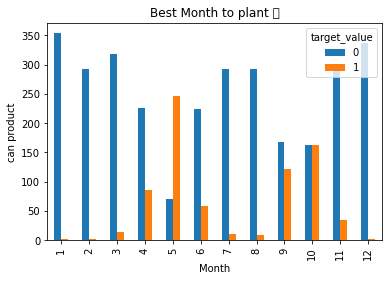

In [1068]:
pd.crosstab(data_c.month,data_c.target_value).plot(kind='bar')
plt.title('Best Month to plant 무')
plt.xlabel('Month')
plt.ylabel('can product')
plt.savefig('can_produce_per_month')

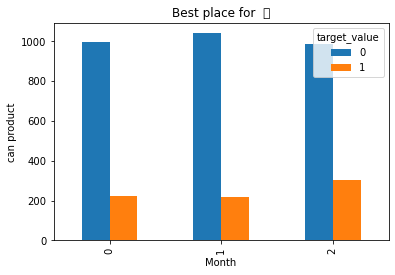

In [1069]:
pd.crosstab(data_c.area_id,data_c.target_value).plot(kind='bar')
plt.title('Best place for  무')
plt.xlabel('Month')
plt.ylabel('can product')
plt.savefig('can_produce_per_month')

## split samples : 70% train and 30% validation

In [936]:
data_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3772 entries, 2 to 5673
Data columns (total 14 columns):
date            3772 non-null datetime64[ns]
area            3772 non-null object
dayAvgRhm       3772 non-null int64
dayAvgTa        3772 non-null int64
dayAvgWs        3772 non-null int64
dayMaxTa        3772 non-null int64
dayMinRhm       3772 non-null int64
daySumRn        3772 non-null int64
daySumSs        3772 non-null int64
month           3772 non-null int64
day             3772 non-null int64
area_id         3772 non-null int64
can_produce     3772 non-null bool
target_value    3772 non-null int32
dtypes: bool(1), datetime64[ns](1), int32(1), int64(10), object(1)
memory usage: 401.5+ KB


In [937]:
# shuffle the samples
data_c = data_c.sample(n = len(data_c), random_state = 42)
data_c = data_c.reset_index(drop = True)
data_valid = data_c.sample(frac = 0.3, random_state = 42)
data_train = data_c.drop(data_valid.index)

In [938]:
#calcul Prevalence
print('Valid prevalence(n = %d):%.3f'%(len(data_valid), calc_prevalence(data_valid.target_value.values)))
print('Train prevalence(n = %d):%.3f'%(len(data_train), calc_prevalence(data_train.target_value.values)))

Valid prevalence(n = 1132):0.228
Train prevalence(n = 2640):0.185


In [1013]:
data_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 14 columns):
date            3772 non-null datetime64[ns]
area            3772 non-null object
dayAvgRhm       3772 non-null int64
dayAvgTa        3772 non-null int64
dayAvgWs        3772 non-null int64
dayMaxTa        3772 non-null int64
dayMinRhm       3772 non-null int64
daySumRn        3772 non-null int64
daySumSs        3772 non-null int64
month           3772 non-null int64
day             3772 non-null int64
area_id         3772 non-null int64
can_produce     3772 non-null bool
target_value    3772 non-null int32
dtypes: bool(1), datetime64[ns](1), int32(1), int64(10), object(1)
memory usage: 372.2+ KB


In [1014]:
# table of features
features2use = ['month', 'area_id'] ##, 'dayMaxTa', 'dayAvgTa', 'dayAvgRhm']

In [1015]:
X_train = data_train[features2use].values
X_valid = data_valid[features2use].values

y_train = data_train['target_value'].values
y_valid = data_valid['target_value'].values

print('training shapes: ', X_train.shape, y_train.shape)
print('valid shapes: ', X_valid.shape, y_valid.shape)

training shapes:  (2640, 2) (2640,)
valid shapes:  (1132, 2) (1132,)


In [1016]:
#Baseline Mean Error
from sklearn.metrics import mean_absolute_error
y_pred = [y_train.mean()] * len(y_train)

print('BaseLine MAE: ', round(mean_absolute_error(y_train, y_pred), 5))

BaseLine MAE:  0.30184


## Model with Logistic regression 

In [1017]:
data_c

,date,area,dayAvgRhm,dayAvgTa,dayAvgWs,dayMaxTa,dayMinRhm,daySumRn,daySumSs,month,day,area_id,can_produce,target_value
0,2017-10-21,춘천,79,13,0,23,33,0,7,10,21,1,False,0
1,2019-10-03,평택,85,22,2,27,57,16,0,10,3,0,False,0
2,2020-09-09,제주,68,25,2,28,45,0,7,9,9,2,False,0
3,2019-02-05,제주,57,9,2,13,47,0,8,2,5,2,False,0
4,2018-05-06,평택,94,15,1,19,65,24,0,5,6,0,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,2020-07-21,춘천,74,25,1,31,39,0,8,7,21,1,False,0
3768,2017-02-12,평택,66,-1,2,3,38,0,0,2,12,0,False,0
3769,2019-10-04,춘천,85,20,0,26,59,0,6,10,4,1,True,1
3770,2020-03-07,제주,84,10,2,11,64,8,0,3,7,2,False,0


In [1023]:
#fit a logistic regression in on the training dataset 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 

model = LogisticRegression(solver='lbfgs')
#fit
model.fit(X_train, y_train)

#make predictions

y_pred = model.predict(X_valid)
print(y_pred)
#evaluatin 

[0 0 0 ... 0 0 0]


In [1024]:
print('Accuracy: ', metrics.accuracy_score(y_valid, y_pred))
plt.show()

Accuracy:  0.7720848056537103


In [1027]:
model = LogisticRegression(solver='lbfgs')
#fit
model.fit(X_train, y_train)
#make predictions
model.fit(X_train, y_train)
new_input = [[5, 2]]   ###'month', 'area_id', 'dayMaxTa', 'dayAvgTa', 'dayAvgRhm'

new_output = model.predict(new_input)
#evaluatin 
#acc = accuracy_score(y_train, yhat)
#input

print(new_output)
#print(acc)

[0]


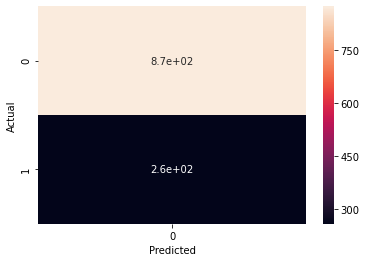

In [1026]:
### Confusion machine 
confusion_matrix = pd.crosstab(y_valid, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

## Model with random Forest

In [975]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth = 5, n_estimators=100, random_state = 42)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

#### Prediction 

In [1037]:
y_train_preds = rf.predict_proba(X_train)[:,1]
y_valid_preds = rf.predict_proba(X_valid)[:,1]

#### Performance evalution 

In [1002]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score
def calc_specificity(y_actual, y_pred, thresh):
 # calculates specificity
 return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

def print_report(y_actual, y_pred, thresh):  
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = calc_specificity(y_actual, y_pred, thresh) 
    print('AUC:%.3f'%auc)
    print('accuracy:%.3f'%accuracy)
    print('recall:%.3f'%recall)
    print('precision:%.3f'%precision)
    print('specificity:%.3f'%specificity)
    print('prevalence:%.3f'%calc_prevalence(y_actual))
    print(' ')
    return auc, accuracy, recall, precision, specificity

In [1005]:
thresh = 0.201
print('random Forest')
print('trining')
print_report(y_train, y_train_preds, thresh);
print('validation: ')
print_report(y_valid, y_valid_preds, thresh);

random Forest
trining
AUC:0.905
accuracy:0.842
recall:0.798
precision:0.550
specificity:0.852
prevalence:0.185
 
validation: 
AUC:0.904
accuracy:0.838
recall:0.779
precision:0.615
specificity:0.856
prevalence:0.228
 


### Testing with personal entries

In [1038]:
my_input = [[5, 2]]  ###'month', ''dayMaxTa', 'dayAvgTa', 'dayAvgRhm'
my_output = rf.predict(my_input)
x = rf.predict(X_valid)
print(my_input, my_output)
print(x)

[[5, 2]] [1]
[0 0 0 ... 0 0 1]


### Ploting 

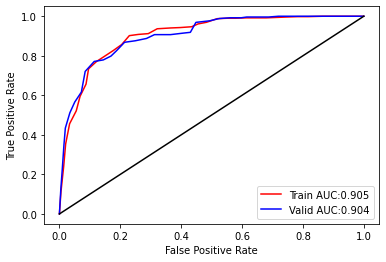

In [1039]:
### ROC curve 
from sklearn.metrics import roc_curve

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_preds)
auc_train = roc_auc_score(y_train, y_train_preds)
fpr_valid, tpr_valid, thresholds_valid = roc_curve(y_valid, y_valid_preds)
auc_valid = roc_auc_score(y_valid, y_valid_preds)
plt.plot(fpr_train, tpr_train, 'r-',label ='Train AUC:%.3f'%auc_train)
plt.plot(fpr_valid, tpr_valid, 'b-',label ='Valid AUC:%.3f'%auc_valid)
plt.plot([0,1],[0,1], 'k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### investigating features for better usage

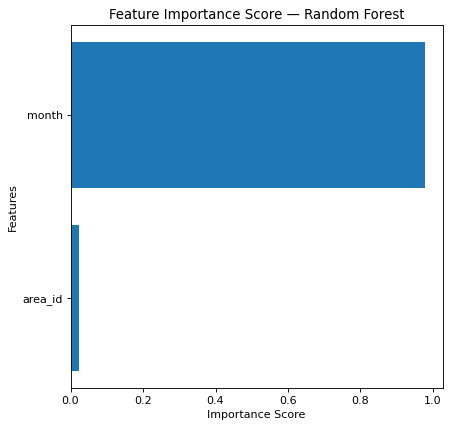

In [1040]:
feature_importances = pd.DataFrame(rf.feature_importances_,
 index = features2use,
 columns=['importance']).sort_values('importance',ascending=False)

num = min([50,len(features2use)])
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]
plt.figure(num=None, figsize=(6, 6), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Feature Importance Score — Random Forest')
plt.yticks(ylocs, feature_labels)
plt.show()

### Try to create random input to see if the model works 